In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


# I- Clustering des données synthétiques via K-means

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
blob_centers = np.array(
[[ 0.2, 2.3],
[-1.5 , 2.3],
[-2.8, 1.8],
[-2.8, 2.8],
[-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
# "X" représente les données et "y" représente les indices de clusters réels
X, y = make_blobs(n_samples=2000, centers=blob_centers,
cluster_std=blob_std, random_state=7)

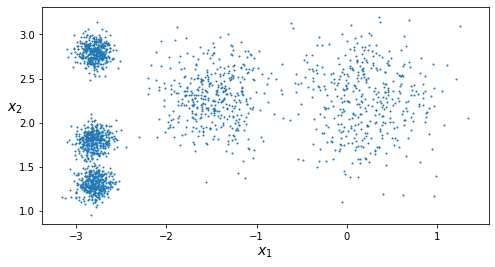

In [ ]:
import matplotlib.pyplot as plt
def plot_clusters(X, y=None):
  plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
  plt.xlabel("$x_1$", fontsize=14)
  plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score

# Question 5
kmeans = KMeans(n_clusters=5, random_state=42)

# Question 6
y_pred = kmeans.fit_predict(X)
print("Indices des clusters prédits: ", y_pred)

# Question 7
nmi_score = normalized_mutual_info_score(y, y_pred)
print("NMI Score: ", nmi_score)

# Question 8
print("Coordonnées des centroïdes: ")
print(kmeans.cluster_centers_)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Indices des clusters prédits:  [4 0 1 ... 2 1 0]
NMI Score:  0.9676600730451858
Coordonnées des centroïdes: 
[[-2.80389616  1.80117999]
 [ 0.20876306  2.25551336]
 [-2.79290307  2.79641063]
 [-1.46679593  2.28585348]
 [-2.80037642  1.30082566]]


In [ ]:
X_new = np.array([[-3, 2.5]])

In [ ]:
# Question 9.b
distances = kmeans.transform(X_new)
closest_cluster_index = np.argmin(distances)
print("Le cluster le plus proche de X_new est: ", closest_cluster_index)

# Question 9.c
predicted_cluster = kmeans.predict(X_new)
print("L'indice de cluster prédit pour X_new est: ", predicted_cluster)

Le cluster le plus proche de X_new est:  2
L'indice de cluster prédit pour X_new est:  [2]


# II- Clustering des images faciales via K-means

In [ ]:
# Question 11
from sklearn.datasets import fetch_olivetti_faces

# Question 12
olivetti = fetch_olivetti_faces()
print(olivetti.DESCR)

# Question 13
print("Indices de cluster : ")
print(olivetti.target)

# Question 14
print("Données : ")
print(olivetti.data)

# Question 15
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(olivetti.data, olivetti.target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Question 16
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=40, random_state=42)
kmeans.fit(X_train)

# Question 17
y_val_predicted = kmeans.predict(X_val)
print("Indices de cluster prédits : ")
print(y_val_predicted)

# Question 18
from sklearn.metrics import normalized_mutual_info_score

nmi = normalized_mutual_info_score(y_val, y_val_predicted)
print("NMI du modèle : ", nmi)


.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Indices de cluster prédits : 
[17 14 22 34 37 15  7 12 37 11 15 17 18  4 30 36  9 37 22 38 17  3 23 18
 14  8 19  4 34 37 19 38 23 20 23 26 11 29  3  9 36 36 23  2  9 23 19 11
 11 37  8 14  3 11  4 34 23 11 11  0 38 35  0 22 11  5 27 31  1  6 31 19
 23  3 23  4  8 23 22 34]
NMI du modèle :  0.8466255168011063


Cluster 0


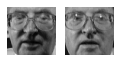

Cluster 1


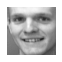

Cluster 2


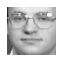

Cluster 3


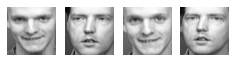

Cluster 4


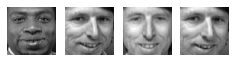

Cluster 5


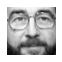

Cluster 6


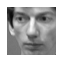

Cluster 7


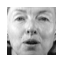

Cluster 8


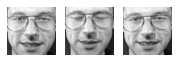

Cluster 9


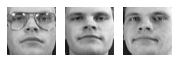

Cluster 11


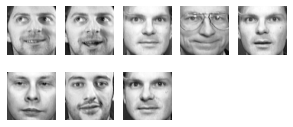

Cluster 12


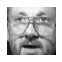

Cluster 14


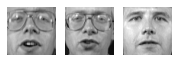

Cluster 15


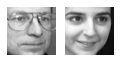

Cluster 17


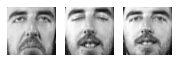

Cluster 18


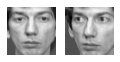

Cluster 19


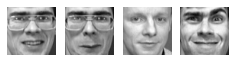

Cluster 20


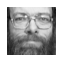

Cluster 22


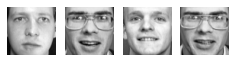

Cluster 23


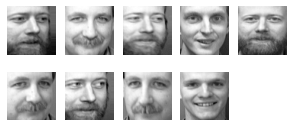

Cluster 26


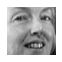

Cluster 27


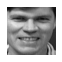

Cluster 29


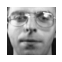

Cluster 30


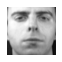

Cluster 31


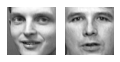

Cluster 34


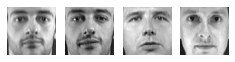

Cluster 35


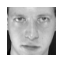

Cluster 36


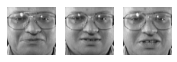

Cluster 37


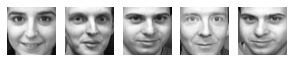

Cluster 38


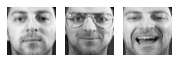

In [35]:
def plot_faces(faces, n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows*1.1))
    for index in range(len(faces)):
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(faces[index].reshape(64, 64), cmap="gray")
        plt.axis("off")
    plt.show()

for cluster_id in np.unique(y_val_predicted):
  print("Cluster", cluster_id)
  in_cluster = y_val_predicted == cluster_id
  faces = X_val[in_cluster].reshape(-1, 64, 64)
  plot_faces(faces)
